In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# One hot encode dataframe so that it is all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [4]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [5]:
# View data
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model with 2 layers
insurance_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
    ]
)

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8676.2734 - mae: 8676.2734
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7887.0684 - mae: 7887.0684
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7607.8315 - mae: 7607.8315
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7688.9902 - mae: 7688.9902
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7674.8101 - mae: 7674.8101
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7653.0581 - mae: 7653.0581
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7562.2095 - mae: 7562.2095
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7721.7568 - mae: 7721.7568
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7576.9531 - mae: 7576.9531
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7661.1792 - mae: 7661.1792

In [9]:
# Check the results of the insurance model on our test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8810.4873 - mae: 8810.4873


[8810.4873046875, 8810.4873046875]

The model is not performing well, to improve the model
1. Add an extra layer with more hidden units
2. Train for longer

In [10]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model with 2 layers
insurance_model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
    ]
)

# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [11]:
# Check the results of the insurance model on our test data
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4991.2427 - mae: 4991.2427


[4991.24267578125, 4991.24267578125]

In [12]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model with 2 layers
insurance_model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
    ]
)

# 2. Compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0)

In [13]:
# Check the results of the insurance model on our test data
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3502.6738 - mae: 3502.6738


[3502.673828125, 3502.673828125]

Text(0.5, 0, 'epochs')

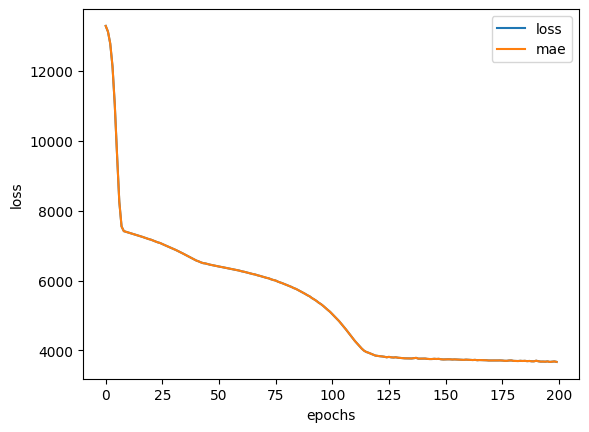

In [14]:
# Plot the loss curve or a training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)

In [15]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all values in this column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X & y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [24]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 500 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=500, verbose=0)

In [25]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3161.5020 - mae: 3161.5020


From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.